# 1.) Import the US Perminent Visas using zip extractor

In [63]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [64]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [175]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/us_perm_visas.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [176]:
df_select_orig=df[["class_of_admission","job_info_experience_num_months","employer_num_employees","foreign_worker_info_education","case_status"]]

In [177]:
X=pd.get_dummies(df_select_orig[["class_of_admission","job_info_experience_num_months","employer_num_employees","foreign_worker_info_education"]])

In [178]:
X.head()

,job_info_experience_num_months,employer_num_employees,class_of_admission_A-3,class_of_admission_A1/A2,class_of_admission_AOS,class_of_admission_AOS/H-1B,class_of_admission_B-1,class_of_admission_B-2,class_of_admission_C-1,class_of_admission_C-3,...,class_of_admission_V-2,class_of_admission_VWB,class_of_admission_VWT,foreign_worker_info_education_Associate's,foreign_worker_info_education_Bachelor's,foreign_worker_info_education_Doctorate,foreign_worker_info_education_High School,foreign_worker_info_education_Master's,foreign_worker_info_education_None,foreign_worker_info_education_Other
0,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
Y=df_select_orig["case_status"]

# 3.) Clean your data for a decision tree


In [180]:
df_select=df_select_orig.copy().dropna()
X=pd.get_dummies(df_select[["class_of_admission","job_info_experience_num_months","employer_num_employees","foreign_worker_info_education"]])

In [181]:
Y=df_select["case_status"].copy()

# 4.) Fit and plot a decision tree of depth 3


In [182]:
from sklearn import tree

In [183]:
clf=tree.DecisionTreeClassifier(max_depth=3)

In [184]:
fit=clf.fit(X,Y)

[Text(0.5, 0.875, 'employer_num_employees <= 34353.0\ngini = 0.561\nsamples = 126002\nvalue = [63957, 53339, 4730, 3976]'),
 Text(0.25, 0.625, 'employer_num_employees <= 28993.0\ngini = 0.571\nsamples = 99137\nvalue = [47870, 43540, 4248, 3479]'),
 Text(0.125, 0.375, 'foreign_worker_info_education_None <= 0.5\ngini = 0.571\nsamples = 93120\nvalue = [46892, 38567, 4230, 3431]'),
 Text(0.0625, 0.125, 'gini = 0.565\nsamples = 87923\nvalue = [44412, 36965, 3348, 3198]'),
 Text(0.1875, 0.125, 'gini = 0.646\nsamples = 5197\nvalue = [2480, 1602, 882, 233]'),
 Text(0.375, 0.375, 'employer_num_employees <= 29050.0\ngini = 0.29\nsamples = 6017\nvalue = [978, 4973, 18, 48]'),
 Text(0.3125, 0.125, 'gini = 0.109\nsamples = 4500\nvalue = [247, 4240, 4, 9]'),
 Text(0.4375, 0.125, 'gini = 0.534\nsamples = 1517\nvalue = [731, 733, 14, 39]'),
 Text(0.75, 0.625, 'employer_num_employees <= 45777.0\ngini = 0.508\nsamples = 26865\nvalue = [16087, 9799, 482, 497]'),
 Text(0.625, 0.375, 'employer_num_employee

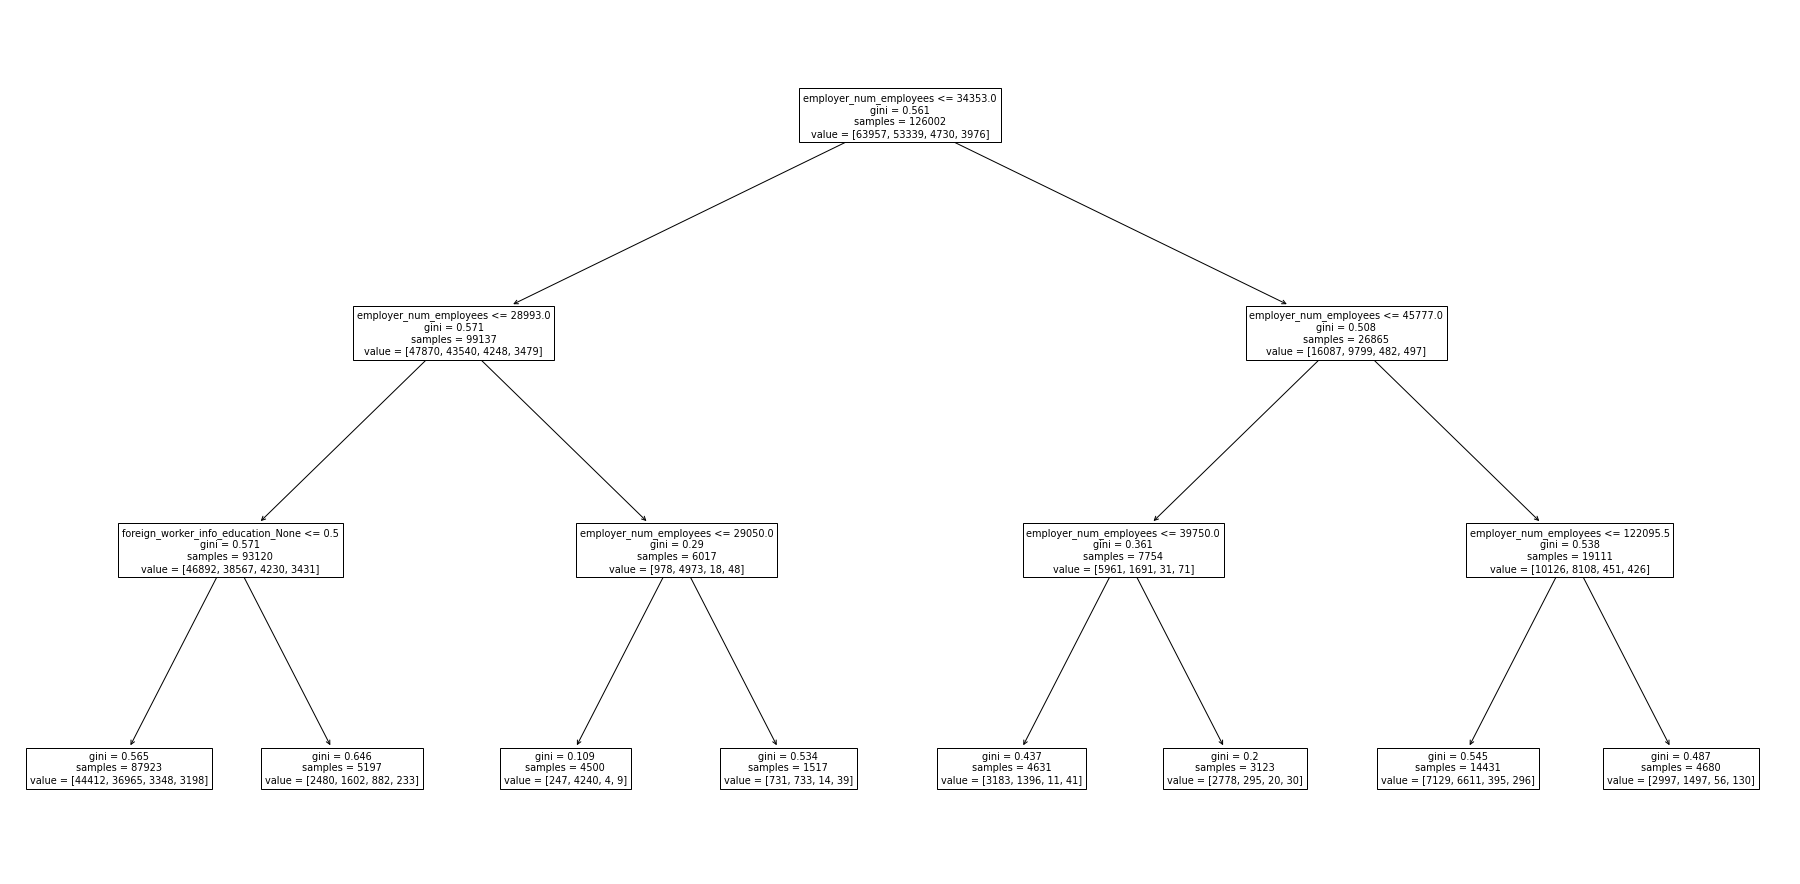

In [185]:
plt.figure(figsize=(32,16))
tree.plot_tree(clf,feature_names=X.columns)

# 5.) Write your interpretation of the largest (by sample size) leaf node


The largest leaf node is the sample with size of 87923. In this sample, the gini is 0.565. The value=[44412,36965,3348,3198]. The observation in this sample is that the applicant's employer has the number of employees lower than or equal to 28993 and his education is not None.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [186]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,shuffle=True,test_size=0.3)

In [187]:
outputs=pd.DataFrame(columns=["max_depth","accuracy"])
for md in range(1,21):
  clf=tree.DecisionTreeClassifier(max_depth=md)
  fit=clf.fit(X_train,y_train)
  oos_accuracy=fit.score(X_test,y_test)
  outputs.loc[md-1,"max_depth"]=md
  outputs.loc[md-1,"accuracy"]=oos_accuracy
outputs

,max_depth,accuracy
0,1,0.508532
1,2,0.540118
2,3,0.540118
3,4,0.546705
4,5,0.550382
5,6,0.559694
6,7,0.561043
7,8,0.564244
8,9,0.56689
9,10,0.568662


**From the table above, when max_depth is 20, the accuracy is the highest which is 0.586.**